In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sagemaker
import boto3
from sagemaker.session import s3_input, Session

In [34]:
bucket_name = 'supraja-var-appledataset' 
my_region = boto3.session.Session().region_name # set the region of the instance
print(my_region)

us-east-1


In [35]:
s3 = boto3.resource('s3')
try:
    if  my_region == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ',e)

S3 bucket created successfully


In [36]:
# set an output path where the trained model will be saved
prefix = 'var-apple-as-a-built-in-algo'
output_path ='s3://{}/{}/output'.format(bucket_name, prefix)
print(output_path)

s3://supraja-var-appledataset/var-apple-as-a-built-in-algo/output


In [6]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [7]:
symbols = ["AAPL","^GSPC","^DJI","^IXIC","^RUT","CL=F","^FTSE","GC=F","SI=F","^N225","JPY=X","GBPUSD=X","EURUSD=X"]
start_date = "2007-01-02"

features_close = {}

for symbol in symbols:
    features = yf.download(symbol, start=start_date)
    features_close[symbol] = features["Close"]

# Combine Close prices into single dataframe
df= pd.concat(features_close.values(), axis=1, keys=features_close.keys())

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,^GSPC,^DJI,^IXIC,^RUT,CL=F,^FTSE,GC=F,SI=F,^N225,JPY=X,GBPUSD=X,EURUSD=X
Date,,,,,,,,,,,,,
2007-01-02,NaN,NaN,NaN,NaN,NaN,61.049999,6310.899902,635.200012,12.818000,NaN,118.830002,1.973399,1.327598
2007-01-03,2.992857,1416.599976,12474.519531,2423.159912,787.419983,58.320000,6319.000000,627.099976,12.555000,NaN,119.339996,1.952210,1.317107
2007-01-04,3.059286,1418.339966,12480.690430,2453.429932,789.950012,55.590000,6287.000000,623.900024,12.727000,17353.669922,118.830002,1.942993,1.309295
2007-01-05,3.037500,1409.709961,12398.009766,2434.250000,775.869995,56.310001,6220.100098,604.900024,12.130000,17091.589844,118.690002,1.930800,1.298499
2007-01-08,3.052500,1412.839966,12423.490234,2438.199951,776.989990,56.090000,6194.200195,607.500000,12.260000,NaN,118.690002,1.940316,1.304002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,195.830002,4582.229980,35459.289062,14316.660156,1981.540039,80.580002,7694.299805,1960.400024,24.370001,32759.230469,138.863998,1.279378,1.097876
2023-07-31,196.449997,4588.959961,35559.531250,14346.019531,2003.180054,81.800003,7699.399902,1970.500000,24.854000,33172.218750,140.757996,1.285397,1.102426
2023-08-01,195.610001,4576.729980,35630.679688,14283.910156,1994.170044,81.370003,7666.299805,1940.699951,24.208000,33476.578125,142.322998,1.283401,1.099759


In [8]:
new_names = {"BTC-USD" : "Bitcoin.close" , "^GSPC" : "gscp.close", "^DJI" : "dji.close","^IXIC": "ixic.close","^RUT":"rut.close",
             "CL=F" : "clf.close", "^FTSE" : "ftse.close","GC=F" : "gfc.close","SI=F" : "sif.close","^N225" : "n225.close",
             "JPY=X" : "jpy.close","GBPUSD=X" : "gbpusd.close", "EURUSD=X" : "eurusd.close"}
df = df.rename(columns=new_names)

# Print the first few rows of the renamed dataframe
print(df.tail())

                  AAPL   gscp.close     dji.close    ixic.close    rut.close   
Date                                                                           
2023-07-28  195.830002  4582.229980  35459.289062  14316.660156  1981.540039  \
2023-07-31  196.449997  4588.959961  35559.531250  14346.019531  2003.180054   
2023-08-01  195.610001  4576.729980  35630.679688  14283.910156  1994.170044   
2023-08-02  192.580002  4513.390137  35282.519531  13973.450195  1966.829956   
2023-08-03         NaN          NaN           NaN           NaN          NaN   

            clf.close   ftse.close    gfc.close  sif.close    n225.close   
Date                                                                       
2023-07-28  80.580002  7694.299805  1960.400024  24.370001  32759.230469  \
2023-07-31  81.800003  7699.399902  1970.500000  24.854000  33172.218750   
2023-08-01  81.370003  7666.299805  1940.699951  24.208000  33476.578125   
2023-08-02  79.489998  7561.600098  1937.400024  23.754000 

In [9]:
df = df.dropna(axis=0)
df.isna().sum()

AAPL            0
gscp.close      0
dji.close       0
ixic.close      0
rut.close       0
clf.close       0
ftse.close      0
gfc.close       0
sif.close       0
n225.close      0
jpy.close       0
gbpusd.close    0
eurusd.close    0
dtype: int64

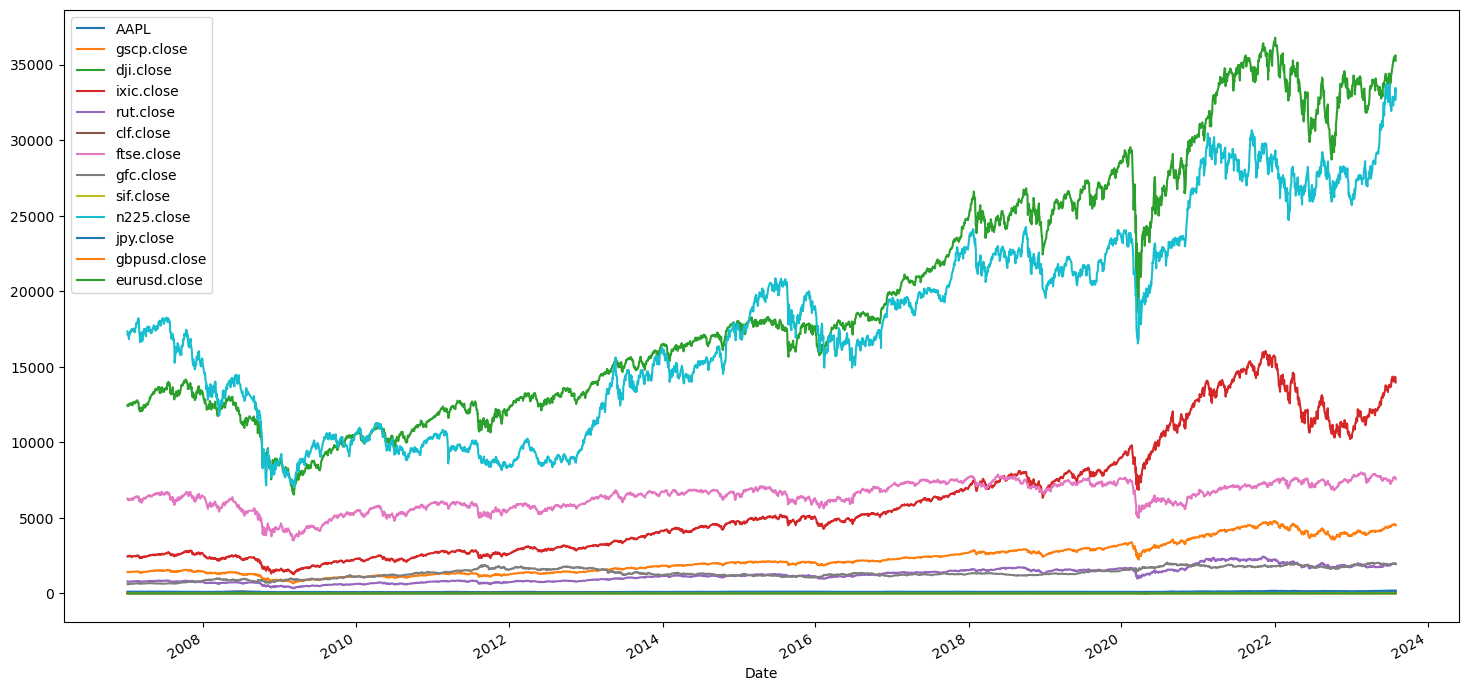

In [10]:
df_plot = pd.DataFrame(df, index=df.index)
# Plot the DataFrame
df_plot.plot(figsize=(18,9))
plt.show()

In [11]:
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# VECTOR AUTO REGRESSION

In [12]:
macro_data = df
print(macro_data.shape) 
macro_data.head()

(3820, 13)


,AAPL,gscp.close,dji.close,ixic.close,rut.close,clf.close,ftse.close,gfc.close,sif.close,n225.close,jpy.close,gbpusd.close,eurusd.close
Date,,,,,,,,,,,,,
2007-01-04,3.059286,1418.339966,12480.690430,2453.429932,789.950012,55.590000,6287.000000,623.900024,12.727,17353.669922,118.830002,1.942993,1.309295
2007-01-05,3.037500,1409.709961,12398.009766,2434.250000,775.869995,56.310001,6220.100098,604.900024,12.130,17091.589844,118.690002,1.930800,1.298499
2007-01-09,3.306071,1412.109985,12416.599609,2443.830078,778.330017,55.639999,6196.100098,613.099976,12.498,17237.769531,119.300003,1.939187,1.299697
2007-01-10,3.464286,1414.849976,12442.160156,2459.330078,778.869995,54.020000,6160.700195,611.599976,12.350,16942.400391,119.510002,1.932404,1.293996
2007-01-11,3.421429,1423.819946,12514.980469,2484.850098,788.450012,51.880001,6230.100098,612.400024,12.375,16838.169922,120.300003,1.944504,1.289507


In [13]:
ad_fuller_result_1 = adfuller(macro_data['AAPL'].diff()[1:])

print('realapple')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
################################################################################
ad_fuller_result_2 = adfuller(macro_data['gscp.close'].diff()[1:])
print('realgscp')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

################################################################################
ad_fuller_result_3 = adfuller(macro_data['dji.close'].diff()[1:])
print('realdji')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')
################################################################################

ad_fuller_result_4 = adfuller(macro_data['ixic.close'].diff()[1:])
print('realixic')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_5 = adfuller(macro_data['rut.close'].diff()[1:])

print('realrut')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')
################################################################################
ad_fuller_result_6 = adfuller(macro_data['clf.close'].diff()[1:])
print('realclf')
print(f'ADF Statistic: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_7 = adfuller(macro_data['ftse.close'].diff()[1:])

print('realftse')
print(f'ADF Statistic: {ad_fuller_result_7[0]}')
print(f'p-value: {ad_fuller_result_7[1]}')
################################################################################
ad_fuller_result_8 = adfuller(macro_data['gfc.close'].diff()[1:])
print('realgfc')
print(f'ADF Statistic: {ad_fuller_result_8[0]}')
print(f'p-value: {ad_fuller_result_8[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_9 = adfuller(macro_data['sif.close'].diff()[1:])

print('realsif')
print(f'ADF Statistic: {ad_fuller_result_9[0]}')
print(f'p-value: {ad_fuller_result_9[1]}')
################################################################################
ad_fuller_result_10 = adfuller(macro_data['n225.close'].diff()[1:])
print('realn225')
print(f'ADF Statistic: {ad_fuller_result_10[0]}')
print(f'p-value: {ad_fuller_result_10[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_11 = adfuller(macro_data['jpy.close'].diff()[1:])

print('realjpy')
print(f'ADF Statistic: {ad_fuller_result_11[0]}')
print(f'p-value: {ad_fuller_result_11[1]}')
################################################################################
ad_fuller_result_12 = adfuller(macro_data['gbpusd.close'].diff()[1:])
print('realgbpusd')
print(f'ADF Statistic: {ad_fuller_result_12[0]}')
print(f'p-value: {ad_fuller_result_12[1]}')

print('\n---------------------\n')
################################################################################ 	eurusd.close
ad_fuller_result_13 = adfuller(macro_data['eurusd.close'].diff()[1:])
print('realeurusd')
print(f'ADF Statistic: {ad_fuller_result_13[0]}')
print(f'p-value: {ad_fuller_result_13[1]}')


realapple
ADF Statistic: -12.62495294924397
p-value: 1.5489039049265792e-23
realgscp
ADF Statistic: -13.067099882036578
p-value: 1.991934123441915e-24

---------------------

realdji
ADF Statistic: -12.898888696954959
p-value: 4.289993348254061e-24
realixic
ADF Statistic: -12.817564738458465
p-value: 6.252820915808014e-24

---------------------

realrut
ADF Statistic: -17.687443208389766
p-value: 3.584973283954969e-30
realclf
ADF Statistic: -50.10798305763573
p-value: 0.0

---------------------

realftse
ADF Statistic: -29.41305520294541
p-value: 0.0
realgfc
ADF Statistic: -14.348810535370967
p-value: 1.0300498075632665e-26

---------------------

realsif
ADF Statistic: -13.809911725265321
p-value: 8.268117577112767e-26
realn225
ADF Statistic: -35.82863572228864
p-value: 0.0

---------------------

realjpy
ADF Statistic: -50.01421898928802
p-value: 0.0
realgbpusd
ADF Statistic: -18.369029238954123
p-value: 2.2199616165376757e-30

---------------------

realeurusd
ADF Statistic: -20.513

In [14]:
df.columns

Index(['AAPL', 'gscp.close', 'dji.close', 'ixic.close', 'rut.close',
       'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close',
       'jpy.close', 'gbpusd.close', 'eurusd.close'],
      dtype='object')

In [15]:
macro_data = macro_data[['AAPL','gscp.close','dji.close', 'ixic.close', 'rut.close',
       'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close',
       'jpy.close', 'gbpusd.close', 'eurusd.close']]
print(macro_data.shape)

(3820, 13)


In [16]:
train_df=macro_data[:-30]
test_df=macro_data[-30:]

In [37]:
import os
train_csv = train_df.to_csv('apple-var-train.csv')
test_csv = test_df.to_csv('apple-var-test.csv')

In [38]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train/apple-var-train.csv')).upload_file('apple-var-train.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [39]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'test/apple-var-test.csv')).upload_file('apple-var-test.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [20]:
print(train_df.shape,test_df.shape)

(3790, 13) (30, 13)


In [21]:
test_df["AAPL"]

Date
2023-06-20    185.009995
2023-06-21    183.960007
2023-06-22    187.000000
2023-06-23    186.679993
2023-06-26    185.270004
2023-06-27    188.059998
2023-06-28    189.250000
2023-06-29    189.589996
2023-06-30    193.970001
2023-07-03    192.460007
2023-07-05    191.330002
2023-07-06    191.809998
2023-07-07    190.679993
2023-07-10    188.610001
2023-07-11    188.080002
2023-07-12    189.770004
2023-07-13    190.539993
2023-07-14    190.690002
2023-07-18    193.729996
2023-07-19    195.100006
2023-07-20    193.130005
2023-07-21    191.940002
2023-07-24    192.750000
2023-07-25    193.619995
2023-07-26    194.500000
2023-07-27    193.220001
2023-07-28    195.830002
2023-07-31    196.449997
2023-08-01    195.610001
2023-08-02    192.580002
Name: AAPL, dtype: float64

In [22]:
model = VAR(train_df.diff()[1:])

In [23]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        30.55       30.57   1.849e+13       30.56
1        29.80      30.10*   8.772e+12      29.91*
2        29.71       30.29   8.020e+12       29.92
3       29.70*       30.56  7.921e+12*       30.01
4        29.71       30.85   8.029e+12       30.12
5        29.73       31.15   8.167e+12       30.24
6        29.75       31.45   8.335e+12       30.36
7        29.76       31.74   8.427e+12       30.47
8        29.76       32.01   8.373e+12       30.56
9        29.77       32.30   8.468e+12       30.67
10       29.79       32.61   8.687e+12       30.79
11       29.81       32.90   8.826e+12       30.91
12       29.81       33.19   8.850e+12       31.01
13       29.83       33.48   8.995e+12       31.13
14       29.85       33.78   9.197e+12       31.25
15       29.86       34.08   9.340e+12       31.36
16       29.88       34.37   9.

In [24]:
var_model = VARMAX(train_df, order=(1,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                                                                                         Statespace Model Results                                                                                                         
Dep. Variable:     ['AAPL', 'gscp.close', 'dji.close', 'ixic.close', 'rut.close', 'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close', 'jpy.close', 'gbpusd.close', 'eurusd.close']   No. Observations:                 3790
Model:                                                                                                                                                                                     VAR(1)   Log Likelihood             -127369.320
                                                                                                                                                                                      + intercept   AIC                         255284.641
Date:                                                       

In [25]:
n_forecast = 30
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [26]:
predictions.columns=['apple_predicted','gscp_predicted','dji_predicted', 'ixic_predicted', 'rut_predicted',
       'clf_predicted', 'ftse_predicted', 'gfc_predicted', 'sif_predicted', 'n225_predicted',
       'jpy_predicted', 'gbpusd_predicted', 'eurusd_predicted']
predictions

,apple_predicted,gscp_predicted,dji_predicted,ixic_predicted,rut_predicted,clf_predicted,ftse_predicted,gfc_predicted,sif_predicted,n225_predicted,jpy_predicted,gbpusd_predicted,eurusd_predicted
3790,185.054150,4413.440636,34332.206976,13707.378216,1880.344035,71.851832,7620.518392,1955.864709,24.024762,33502.824440,140.594376,1.279600,1.094847
3791,185.186855,4417.068138,34363.458552,13724.084821,1884.878829,71.933492,7599.603714,1953.495105,23.976341,33320.388562,140.884244,1.280587,1.094936
3792,185.317862,4420.490585,34393.024878,13739.779432,1889.104524,72.023258,7579.851904,1951.273688,23.930434,33156.500681,141.141707,1.281541,1.094882
3793,185.446960,4423.724337,34421.039654,13754.542241,1893.048137,72.119616,7561.169198,1949.184892,23.886770,33009.142216,141.370409,1.282461,1.094706
3794,185.573970,4426.784079,34447.622913,13768.445324,1896.733874,72.221243,7543.471196,1947.214898,23.845112,32876.517893,141.573587,1.283351,1.094422
3795,185.698744,4429.683010,34472.882511,13781.553521,1900.183441,72.326982,7526.681844,1945.351433,23.805248,32757.030935,141.754119,1.284211,1.094046
3796,185.821159,4432.433001,34496.915462,13793.925232,1903.416315,72.435820,7510.732544,1943.583599,23.766992,32649.261010,141.914563,1.285043,1.093591
3797,185.941116,4435.044743,34519.809118,13805.613108,1906.449988,72.546878,7495.561344,1941.901720,23.730178,32551.944629,142.057192,1.285848,1.093069
3798,186.058535,4437.527872,34541.642221,13816.664678,1909.300184,72.659389,7481.112235,1940.297203,23.694659,32463.957729,142.184026,1.286627,1.092489
3799,186.173356,4439.891085,34562.485835,13827.122900,1911.981051,72.772690,7467.334513,1938.762415,23.660307,32384.300186,142.296863,1.287381,1.091862


In [27]:
output= predictions.to_csv('apple-var-output.csv')

In [33]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'output/apple-var-output.csv')).upload_file('apple-var-output.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [29]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math 
from statistics import mean

#predictions['apple_predicted']
predictions.index = test_df.index


In [31]:
rmse_apple = math.sqrt(mean_squared_error(predictions['apple_predicted'],test_df['AAPL']))
mape = np.mean(np.abs((test_df['AAPL'] - predictions['apple_predicted']) / test_df['AAPL'])) * 100
mae = np.mean(np.abs(test_df['AAPL'] - predictions['apple_predicted']))

# print the metrics
print("RMSE: ", rmse_apple)
print("MAPE: ", mape) #in %
print("MAE: ", mae)

RMSE:  5.107182051007803
MAPE:  2.3277446628279224
MAE:  4.486763212421597


In [32]:
predictions['apple_predicted']

Date
2023-06-20    185.054150
2023-06-21    185.186855
2023-06-22    185.317862
2023-06-23    185.446960
2023-06-26    185.573970
2023-06-27    185.698744
2023-06-28    185.821159
2023-06-29    185.941116
2023-06-30    186.058535
2023-07-03    186.173356
2023-07-05    186.285531
2023-07-06    186.395029
2023-07-07    186.501830
2023-07-10    186.605923
2023-07-11    186.707307
2023-07-12    186.805989
2023-07-13    186.901984
2023-07-14    186.995309
2023-07-18    187.085991
2023-07-19    187.174058
2023-07-20    187.259542
2023-07-21    187.342479
2023-07-24    187.422908
2023-07-25    187.500868
2023-07-26    187.576401
2023-07-27    187.649552
2023-07-28    187.720365
2023-07-31    187.788884
2023-08-01    187.855157
2023-08-02    187.919230
Name: apple_predicted, dtype: float64